# <u>Training Exercices - Statistics<u>

__<u>Jorge Pineño Pérez<u>__ / Module 0 - Building Blocks

__<u>Training Exercise S.1<u>__

__1.__

In [193]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from scipy.stats import chi2

In [97]:
# import our dataset
rets = pd.read_excel('TrainExerS1.xls')
rets.head()

,Observation,Return
0,1,27.942453
1,2,9.741404
2,3,-5.308032
3,4,-5.493804
4,5,13.182180


In [99]:
# set the index to observation
rets = rets.set_index('Observation')
rets.head()

,Return
Observation,
1,27.942453
2,9.741404
3,-5.308032
4,-5.493804
5,13.182180


__(a)__

In [102]:
# select the returns values as a series
rets_vals = rets.iloc[:, 0]
rets_vals

Observation
1       27.942453
2        9.741404
3       -5.308032
4       -5.493804
5       13.182180
          ...    
996     20.077139
997      6.731551
998     -2.260094
999     10.461378
1000     4.784546
Name: Return, Length: 1000, dtype: float64

In [104]:
# get the number of returns
len_r = len(rets_vals)

# start with i = 5 and go up to 1000
i_vals = range(5, len_r+1)
i_vals

range(5, 1001)

In [106]:
# create lists for m_i and se_i, and for the
# 95% confidence interval (for representing later)
mi = []
se = []
lower = []
upper = []

# start collecting values by iterating through our range
for i in i_vals:
    # get the mean and se for every subset (0 to i)
    subset = rets_vals[:i]
    mean_i = subset.mean()
    std_i = subset.std(ddof=1)
    se_i = std_i / np.sqrt(i)
    # add the mean and se recorded to our lists
    mi.append(mean_i)
    se.append(se_i)
    lower.append(mean_i - 1.96*se_i)
    upper.append(mean_i + 1.96*se_i)

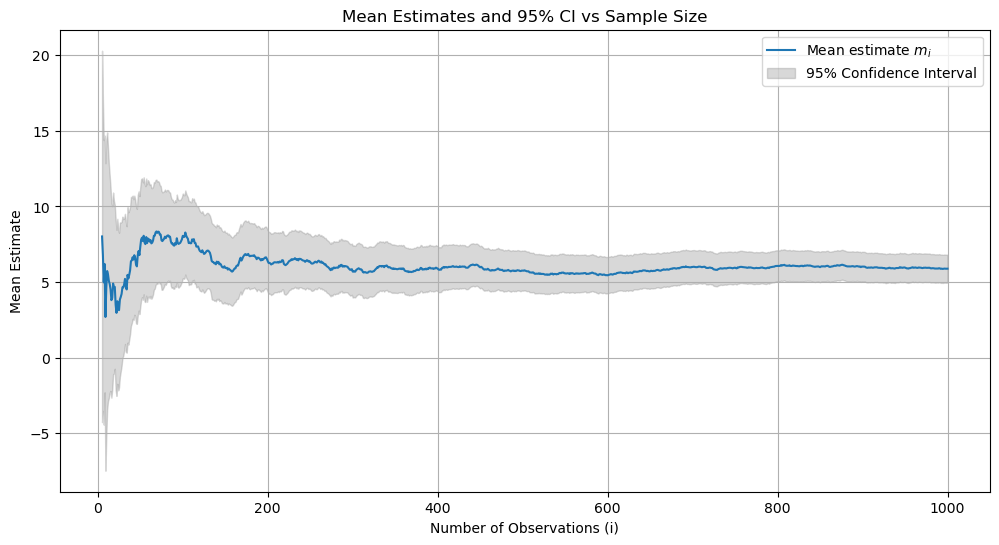

In [112]:
# plot the results
plt.figure(figsize=(12, 6))
plt.plot(i_vals, mi, label='Mean estimate $m_i$')
plt.fill_between(i_vals, lower, upper, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Number of Observations (i)')
plt.ylabel('Mean Estimate')
plt.title('Mean Estimates and 95% CI vs Sample Size')
plt.legend()
plt.grid(True)
plt.show()

__(b)__

The CI for $m_i$ is:
$$m_i \pm 2 \frac{\sigma}{\sqrt{n}}$$

Therefore, the width of the $CI$ is:

$$2 · 2 · \frac{\sigma}{\sqrt{n}} = 4 · \frac{\sigma}{\sqrt{n}}$$

So, for this to be less than 1%, we can solve for $n$:

$$4 · \frac{0.15}{\sqrt{n}} < 0.01$$
$$\frac{0.6}{\sqrt{n}} < 0.01$$
$$\sqrt{n} > \frac{0.6}{0.01} = 60$$
$$n > 60^2 = 3600 \space years$$

__2.__

(...)

__<u>Training Exercise S.2<u>__

__1.__

__(a)__

In [128]:
# start with i = 5 and go up to 30
i_vals = range(5, 31)
i_vals

range(5, 31)

In [130]:
# create lists for t_i and p-value_i for both values of the mean
ti0 = []
ti6 = []
pvi0 = []
pvi6 = []

# start collecting values by iterating through our range
for i in i_values:
    # get ti and the p-values for every subset (0 to i)
    subset = rets_vals[:i]
    t0, pv0 = stats.ttest_1samp(rets_vals[:i], popmean=0)
    t6, pv6 = stats.ttest_1samp(rets_vals[:i], popmean=6)
    # add the values recorded to our lists
    ti0.append(t0)
    ti6.append(t6)
    pvi0.append(pv0)
    pvi6.append(pv6)

In [132]:
# create (and format) a dataframe with the results
results = pd.DataFrame({
    'n': i_vals,
    't-statistic (popmean=0)': ti0,
    'p-value (popmean=0)': pvi0,
    't-statistic (popmean=6)': ti6,
    'p-value (popmean=6)': pvi6,
})
results = results.set_index('n')
results.style.format({
    't-statistic (popmean=0)': '{:.3f}',
    'p-value (popmean=0)': '{:.4f}',
    't-statistic (popmean=6)': '{:.3f}',
    'p-value (popmean=6)': '{:.4f}',
})
results

,t-statistic (popmean=0),p-value (popmean=0),t-statistic (popmean=6),p-value (popmean=6)
n,,,,
5,1.277545,0.270520,0.320922,0.764337
6,1.287947,0.254148,0.148707,0.887596
7,1.035087,0.340533,-0.213624,0.837914
8,1.428230,0.196285,0.044552,0.965709
9,0.516589,0.619416,-0.639108,0.540616
10,0.916395,0.383358,-0.277279,0.787829
11,1.222308,0.249619,-0.059297,0.953884
12,1.283759,0.225609,-0.118173,0.908061
13,1.281850,0.224108,-0.233641,0.819202


__(b)__

In [135]:
# extend our range until i = 200
i_vals2 = range(5, 201)
i_vals2

range(5, 201)

In [137]:
# create new lists for t_i for both values of the mean
ti0_2 = []
ti6_2 = []

# start collecting values by iterating through our range
for i in i_vals2:
    # get ti and the p-values for every subset (0 to i)
    subset = rets_vals[:i]
    t0, pv0 = stats.ttest_1samp(rets_vals[:i], popmean=0)
    t6, pv6 = stats.ttest_1samp(rets_vals[:i], popmean=6)
    # add the values recorded to our lists
    ti0_2.append(t0)
    ti6_2.append(t6)

In [138]:
# create (and format) a dataframe with the results
results2 = pd.DataFrame({
    'n': i_vals2,
    't-statistic (popmean=0)': ti0_2,
    't-statistic (popmean=6)': ti6_2
})
results2 = results2.set_index('n')
results2.style.format({
    't-statistic (popmean=0)': '{:.3f}',
    't-statistic (popmean=6)': '{:.3f}',
})
results2.head()

,t-statistic (popmean=0),t-statistic (popmean=6)
n,,
5,1.277545,0.320922
6,1.287947,0.148707
7,1.035087,-0.213624
8,1.428230,0.044552
9,0.516589,-0.639108


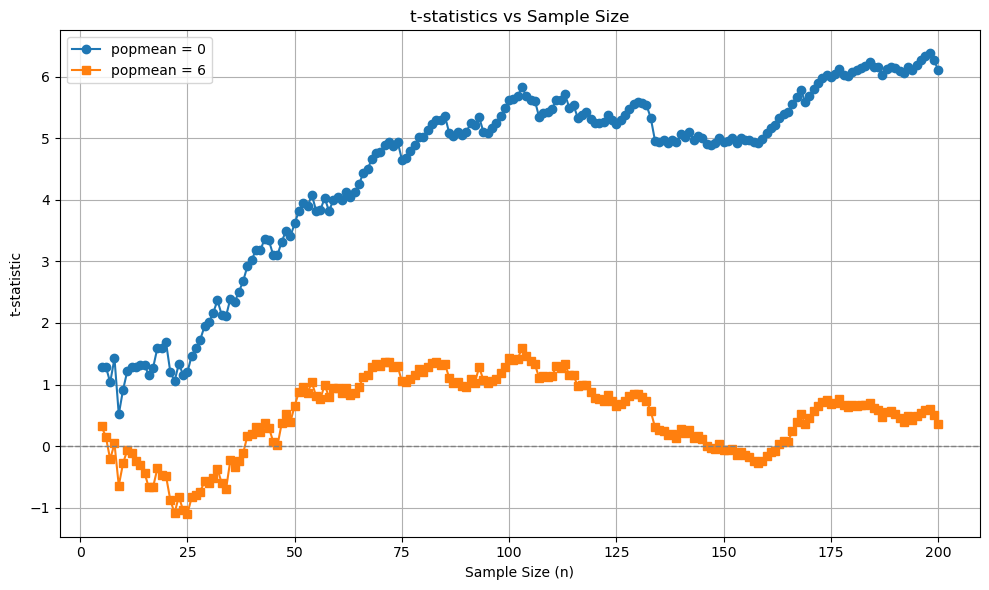

In [173]:
# plot the results
plt.figure(figsize=(10, 6))
plt.plot(results2.index, results2['t-statistic (popmean=0)'], label='popmean = 0', marker='o')
plt.plot(results2.index, results2['t-statistic (popmean=6)'], label='popmean = 6', marker='s')

plt.xlabel('Sample Size (n)')
plt.ylabel('t-statistic')
plt.title('t-statistics vs Sample Size')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [175]:
# get the critical values for the different significance levels
ci10 = []
ci5 = []
ci1 = []

for i in i_vals2:
    # get the one-tailed test critical values for every subset (0 to i)
    df = i-1
    crit10 = t.ppf(1 - 0.1, df)
    crit5 = t.ppf(1 - 0.05, df)
    crit1 = t.ppf(1 - 0.01, df)
    # add the values recorded to our lists
    ci10.append(crit10)
    ci5.append(crit5)
    ci1.append(crit1)

In [177]:
# create (and format) a dataframe with the results
results3 = pd.DataFrame({
    'n': i_vals2,
    'critical value (sl=10%)': ci10,
    'critical value (sl=5%)': ci5,
    'critical value (sl=1%)': ci1
})
results3 = results3.set_index('n')
results3.style.format({
    'critical value (sl=10%)': '{:.3f}',
    'critical value (sl=5%)': '{:.3f}',
    'critical value (sl=1%)': '{:.3f}'
})
results3.head()

,critical value (sl=10%),critical value (sl=5%),critical value (sl=1%)
n,,,
5,1.533206,2.131847,3.746947
6,1.475884,2.015048,3.364930
7,1.439756,1.943180,3.142668
8,1.414924,1.894579,2.997952
9,1.396815,1.859548,2.896459


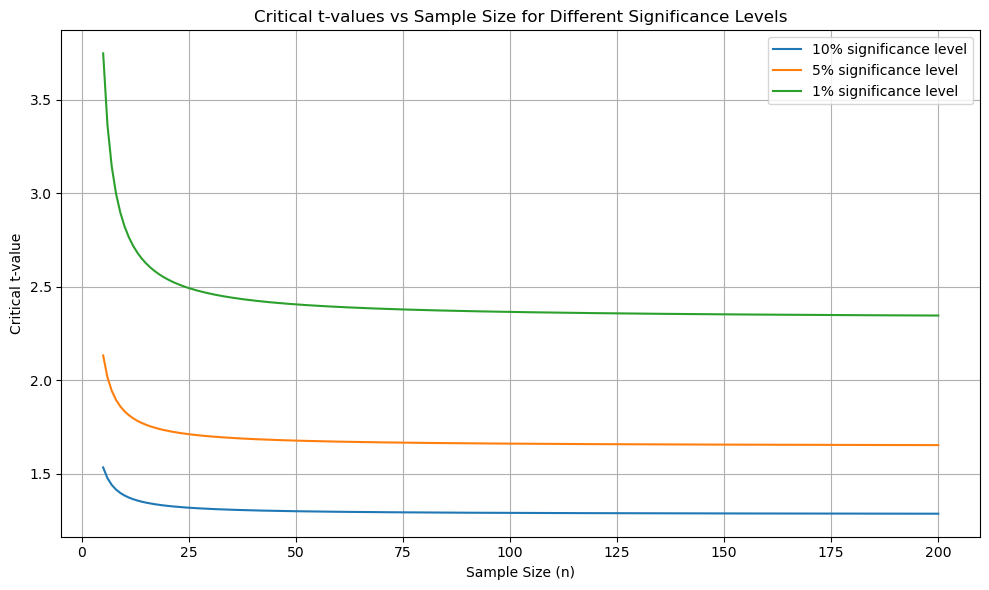

In [187]:
# plot the results
plt.figure(figsize=(10, 6))
plt.plot(results3.index, results3['critical value (sl=10%)'], label='10% significance level')
plt.plot(results3.index, results3['critical value (sl=5%)'], label='5% significance level')
plt.plot(results3.index, results3['critical value (sl=1%)'], label='1% significance level')

plt.xlabel('Sample Size (n)')
plt.ylabel('Critical t-value')
plt.title('Critical t-values vs Sample Size for Different Significance Levels')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

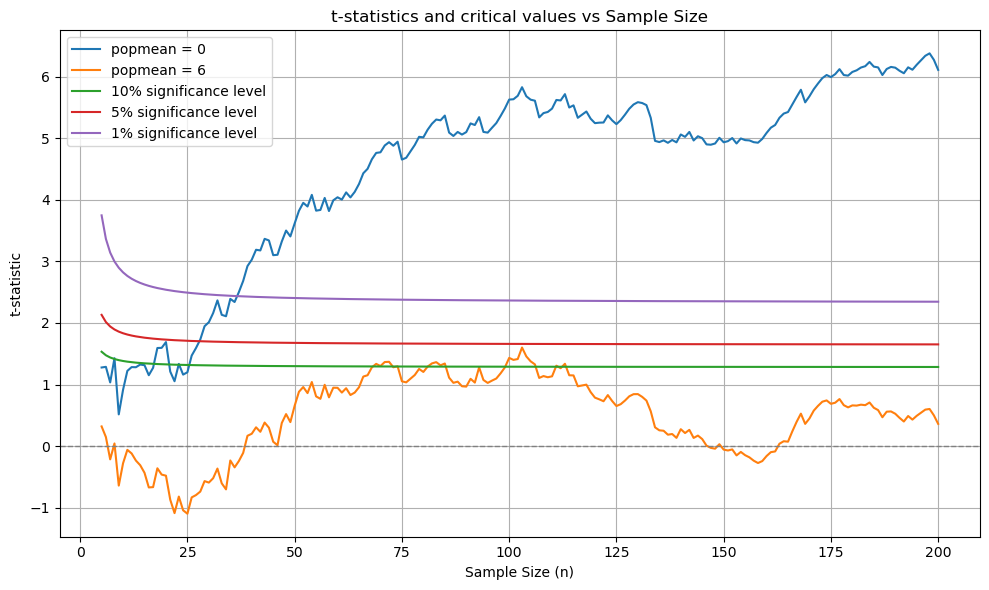

In [189]:
# putting the two plots together
plt.figure(figsize=(10, 6))
plt.plot(results2.index, results2['t-statistic (popmean=0)'], label='popmean = 0')
plt.plot(results2.index, results2['t-statistic (popmean=6)'], label='popmean = 6')
plt.plot(results3.index, results3['critical value (sl=10%)'], label='10% significance level')
plt.plot(results3.index, results3['critical value (sl=5%)'], label='5% significance level')
plt.plot(results3.index, results3['critical value (sl=1%)'], label='1% significance level')

plt.xlabel('Sample Size (n)')
plt.ylabel('t-statistic')
plt.title('t-statistics and critical values vs Sample Size')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

__(c)__

(...)

__(d)__

In [297]:
# start with the hypothesized standard deviations
sigma0_values = [18, 15]

# create a list for the results
results4 = []

for sigma0 in sigma0_values:
    for i in i_vals:
        subset = rets_vals[:i]
        subset_var = np.var(subset, ddof=1)
        df = i - 1
        chi2_stat = (df * subset_var) / (sigma0**2)
        p_value = 1 - chi2.cdf(chi2_stat, df)
        results4.append({
            '': f'$\sigma_o = {sigma0}$%',
            '$n$': i,
            '$X^2$': chi2_stat,
            '$p-value$': p_value
        })

# convert the results to a DataFrame with multi-index
results_df = pd.DataFrame(results4)
results_df = results_df.pivot(index='$n$', columns='', values=['$X^2$', '$p-value$'])
results_df = results_df.swaplevel(axis=1).sort_index(axis=1)
results_df = results_df.round(4)
results_df.head()

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_2536\2896412166.py:15: SyntaxWarning: invalid escape sequence '\s'
  '': f'$\sigma_o = {sigma0}$%',


$\sigma_o = 15$%           $\sigma_o = 18$%          
               $X^2$ $p-value$            $X^2$ $p-value$
$n$                                                      
5             3.4968    0.4784           2.4283    0.6575
6             3.6984    0.5936           2.5683    0.7662
7             4.3097    0.6348           2.9928    0.8097
8             4.6799    0.6990           3.2499    0.8610
9             8.6251    0.3749           5.9897    0.6484

In [315]:
# create a new list for the (196) results
results5 = []

for sigma0 in sigma0_values:
    for i in i_vals2:
        subset = rets_vals[:i]
        subset_var = np.var(subset, ddof=1)
        df = i - 1
        chi2_stat = (df * subset_var) / (sigma0**2)
        p_value = 1 - chi2.cdf(chi2_stat, df)
        results5.append({
            '': f'$\sigma_o = {sigma0}$%',
            '$n$': i,
            '$X^2$': chi2_stat,
            '$p-value$': p_value
        })

# convert the results to a DataFrame with multi-index
results_df = pd.DataFrame(results5)
results_df = results_df.pivot(index='$n$', columns='', values=['$X^2$', '$p-value$'])
results_df = results_df.swaplevel(axis=1).sort_index(axis=1)
results_df = results_df.round(4)
len(results_df)

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_2536\2539485244.py:12: SyntaxWarning: invalid escape sequence '\s'
  '': f'$\sigma_o = {sigma0}$%',


196

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_2536\1393915619.py:14: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title('$X^2$ vs Sample Size for Different $\sigma_o$')


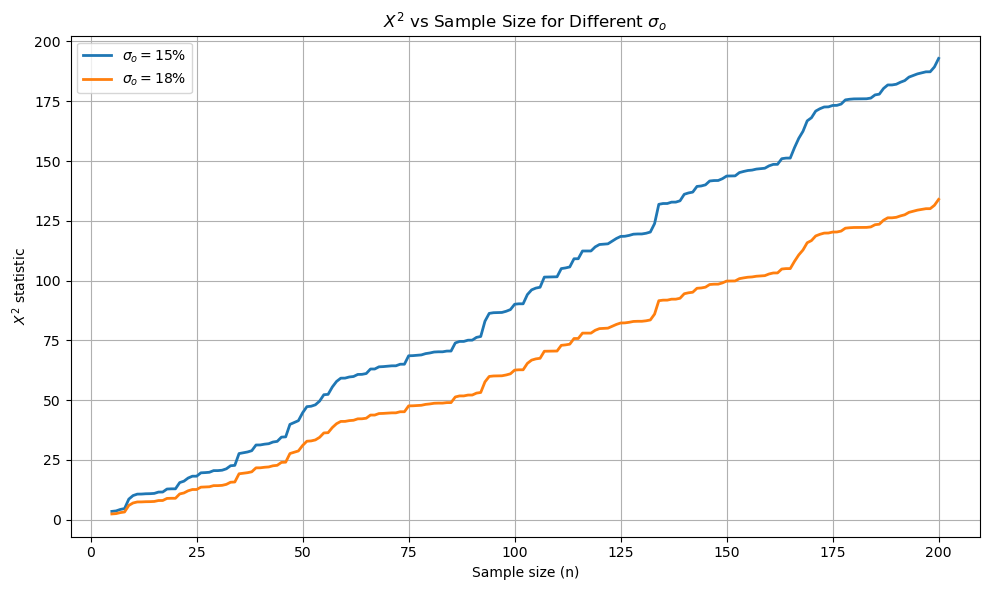

In [319]:
# plot the series for the two standard deviation values
fig, ax = plt.subplots(figsize=(10, 6))

for sigma_label in results_df.columns.levels[0]:
    ax.plot(
        results_df.index,
        results_df[sigma_label]['$X^2$'],
        label=f'{sigma_label}',
        linewidth=2
    )

ax.set_xlabel('Sample size (n)')
ax.set_ylabel('$X^2$ statistic')
ax.set_title('$X^2$ vs Sample Size for Different $\sigma_o$')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

In [339]:
# get the critical values for the different significance levels
ci10_upper = []
ci5_upper  = []
ci1_upper  = []
ci10_lower = []
ci5_lower  = []
ci1_lower  = []

for i in i_vals2:
    # get the two-tailed test critical values for every subset (0 to i)
    df = i-1
    crit10_upper = chi2.ppf(1 - 0.05, df)
    crit5_upper = chi2.ppf(1 - 0.025, df)
    crit1_upper = chi2.ppf(1 - 0.005, df)

    crit10_lower = chi2.ppf(0.05, df)
    crit5_lower = chi2.ppf(0.025, df)
    crit1_lower = chi2.ppf(0.005, df)
    # add the values recorded to our lists
    ci10_upper.append(crit10_upper)
    ci5_upper.append(crit5_upper)
    ci1_upper.append(crit1_upper)
    ci10_lower.append(crit10_lower)
    ci5_lower.append(crit5_lower)
    ci1_lower.append(crit1_lower)

In [341]:
# create a dataframe with the results
results6 = pd.DataFrame({
    'n': i_vals2,
    'critical value (10%)': ci10,
    'critical value (5%)': ci5,
    'critical value (1%)': ci1,
    'critical value (10% lower)': ci10_lower,
    'critical value (5% lower)': ci5_lower,
    'critical value (1% lower)': ci1_lower
}).set_index('n')
results6.head()

,critical value (10%),critical value (5%),critical value (1%),critical value (10% lower),critical value (5% lower),critical value (1% lower)
n,,,,,,
5,7.779440,9.487729,13.276704,0.710723,0.484419,0.206989
6,9.236357,11.070498,15.086272,1.145476,0.831212,0.411742
7,10.644641,12.591587,16.811894,1.635383,1.237344,0.675727
8,12.017037,14.067140,18.475307,2.167350,1.689869,0.989256
9,13.361566,15.507313,20.090235,2.732637,2.179731,1.344413


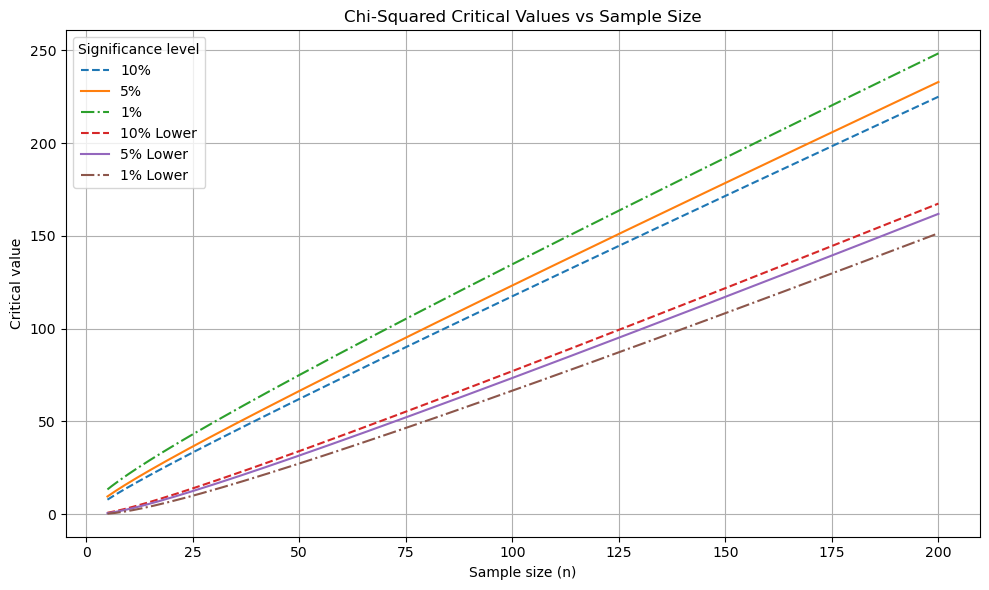

In [345]:
# plot the results
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(results6.index, results6['critical value (10%)'], label='10%', linestyle='--')
ax.plot(results6.index, results6['critical value (5%)'], label='5%', linestyle='-')
ax.plot(results6.index, results6['critical value (1%)'], label='1%', linestyle='-.')

ax.plot(results6.index, results6['critical value (10% lower)'], label='10% Lower', linestyle='--')
ax.plot(results6.index, results6['critical value (5% lower)'], label='5% Lower', linestyle='-')
ax.plot(results6.index, results6['critical value (1% lower)'], label='1% Lower', linestyle='-.')

ax.set_title('Chi-Squared Critical Values vs Sample Size')
ax.set_xlabel('Sample size (n)')
ax.set_ylabel('Critical value')
ax.legend(title='Significance level')
ax.grid(True)

plt.tight_layout()
plt.show()

<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_2536\1521260229.py:22: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title('$X^2$ vs Sample Size for Different $\sigma_o$')


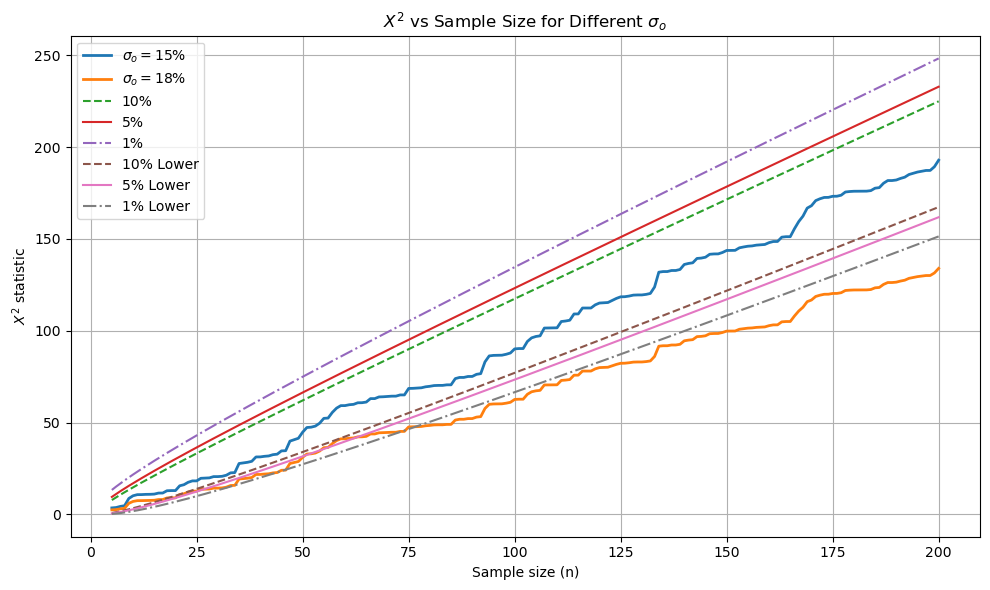

In [347]:
# putting the two plots together
fig, ax = plt.subplots(figsize=(10, 6))

for sigma_label in results_df.columns.levels[0]:
    ax.plot(
        results_df.index,
        results_df[sigma_label]['$X^2$'],
        label=f'{sigma_label}',
        linewidth=2
    )

ax.plot(results6.index, results6['critical value (10%)'], label='10%', linestyle='--')
ax.plot(results6.index, results6['critical value (5%)'], label='5%', linestyle='-')
ax.plot(results6.index, results6['critical value (1%)'], label='1%', linestyle='-.')

ax.plot(results6.index, results6['critical value (10% lower)'], label='10% Lower', linestyle='--')
ax.plot(results6.index, results6['critical value (5% lower)'], label='5% Lower', linestyle='-')
ax.plot(results6.index, results6['critical value (1% lower)'], label='1% Lower', linestyle='-.')

ax.set_xlabel('Sample size (n)')
ax.set_ylabel('$X^2$ statistic')
ax.set_title('$X^2$ vs Sample Size for Different $\sigma_o$')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

__(f)__

(...)

__2.__

(...)